In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colour import Color

In [298]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [299]:
df.shape

(569, 33)

In [300]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [302]:
df.shape

(569, 33)

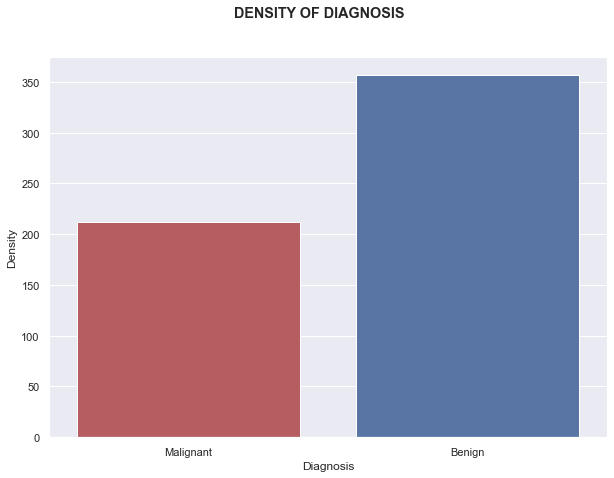

In [399]:
fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle('DENSITY OF DIAGNOSIS', fontweight='bold')

colors = {'B': "b", 'M': "r"}
sns.set(style='darkgrid')
sns.countplot(data=df, x='diagnosis', palette=colors)
ax.set_xticklabels(['Malignant','Benign'])
ax.set_ylabel('Density')
ax.set_xlabel('Diagnosis')

plt.show()

In [304]:
mean_df = df.iloc[:, 0:12]
mean_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [361]:
mean_df.shape

(569, 12)

In [320]:
mean_df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)

In [321]:
mean_df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917


#### Concave Points Mean

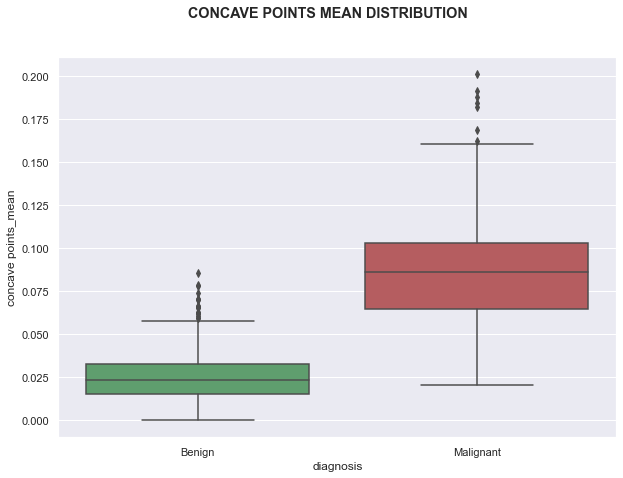

In [322]:
fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle('CONCAVE POINTS MEAN DISTRIBUTION', fontweight='bold')

colors = {0: "g", 1: "r"}
sns.set(style='darkgrid')
sns.boxplot(data=mean_df, x='diagnosis', y='concave points_mean', palette=colors)
ax.set_xticklabels(['Benign','Malignant'])

plt.show()

In [323]:
def format_column_name(columns:list):
    new_names = {column:' '.join(column.split('_')[::-1]).title() for column in columns}
    new_names['id'] = 'id'
    return new_names

In [362]:
corr_df = mean_df.corr()

In [366]:
corr_df.rename(columns=format_column_name(corr_df.columns), inplace=True)
corr_df.rename(index=format_column_name(corr_df.index), inplace=True)

In [367]:
corr_df

,id,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Dimension Fractal
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511
Diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
Mean Radius,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Mean Texture,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Mean Perimeter,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Mean Area,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Mean Smoothness,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Mean Compactness,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Mean Concavity,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
Mean Concave Points,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917


In [378]:
def half_heatmap(df:pd.DataFrame):
    mask = np.zeros_like(df, dtype = bool)
    mask[np.triu_indices_from(mask)] = True
    correlations = df.mask(mask)
    return correlations

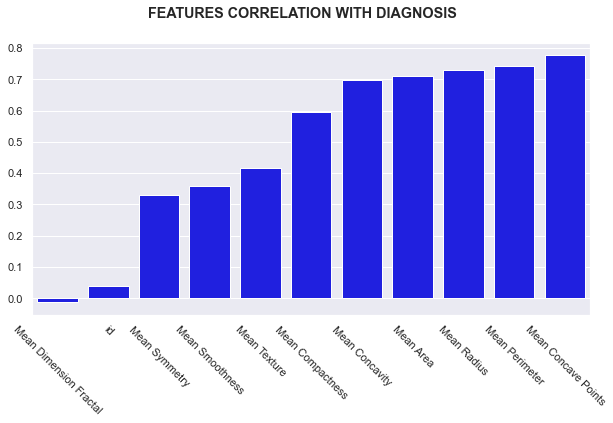

In [325]:
index = mean_df.corr().sort_values(by='diagnosis', ascending=True).index[:-1]
corr_values = mean_df.corr().sort_values(by='diagnosis', ascending=True)['diagnosis'].values[:-1]
columns_names = format_column_name(list(index))

fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('FEATURES CORRELATION WITH DIAGNOSIS', fontweight='bold')
sns.set_style('darkgrid')
sns.barplot(x=index, y=corr_values, color='blue')

ax.set_xticklabels(labels=columns_names.values(),rotation = -45, fontdict={'horizontalalignment':'center'})
plt.show()

In [379]:
half_heatmap(corr_df)

,id,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Dimension Fractal
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diagnosis,0.039769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean Radius,0.074626,0.730029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean Texture,0.099770,0.415185,0.323782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean Perimeter,0.073159,0.742636,0.997855,0.329533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean Area,0.096893,0.708984,0.987357,0.321086,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean Smoothness,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,NaN,NaN,NaN,NaN,NaN,NaN
Mean Compactness,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,NaN,NaN,NaN,NaN,NaN
Mean Concavity,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,NaN,NaN,NaN,NaN
Mean Concave Points,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,NaN,NaN,NaN


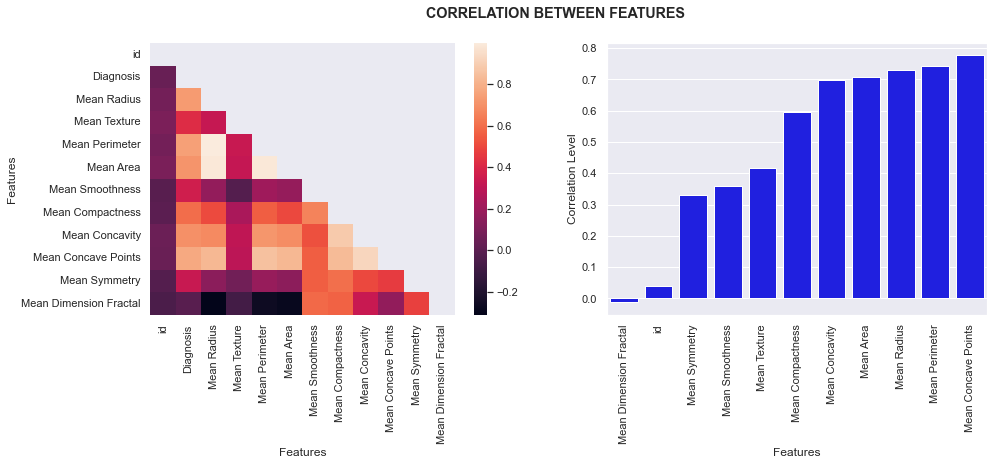

In [382]:
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('CORRELATION BETWEEN FEATURES', fontweight='bold')

colors = {'B': "g", 'M': "r"}
sns.set(style='darkgrid')
sns.heatmap(ax=ax_1, data=half_heatmap(corr_df))
ax_1.set_ylabel('Features')
ax_1.set_xlabel('Features')


index = mean_df.corr().sort_values(by='diagnosis', ascending=True).index[:-1]
corr_values = mean_df.corr().sort_values(by='diagnosis', ascending=True)['diagnosis'].values[:-1]
columns_names = format_column_name(list(index))
sns.barplot(ax=ax_2, x=index, y=corr_values, color='blue')
ax_2.set_ylabel('Correlation Level')
ax_2.set_xlabel('Features')
ax_2.set_xticklabels(labels=columns_names.values(),rotation = 90, fontdict={'horizontalalignment':'center'})

plt.show()

In [339]:
benign_df= mean_df[mean_df.loc[:,'diagnosis']==1]
malignant_df= mean_df[mean_df.loc[:,'diagnosis']==0]

In [340]:
benign_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


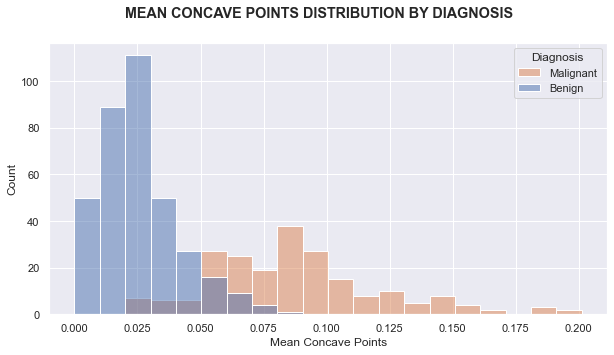

In [398]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('MEAN CONCAVE POINTS DISTRIBUTION BY DIAGNOSIS', fontweight='bold')

colors = {0: "g", 1: "r"}
sns.set(style='darkgrid')
sns.histplot(ax=ax, data=mean_df, x = 'concave points_mean', bins = 20, hue='diagnosis', color=colors)

ax.set_xlabel('Mean Concave Points')
ax.legend(['Malignant','Benign'], title='Diagnosis')

plt.show()

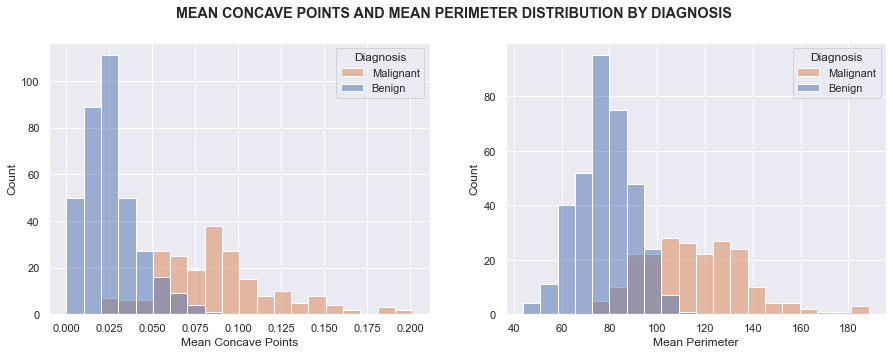

In [403]:
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('MEAN CONCAVE POINTS AND MEAN PERIMETER DISTRIBUTION BY DIAGNOSIS', fontweight='bold')

colors = {0: "g", 1: "r"}
sns.set(style='darkgrid')

sns.histplot(ax=ax_1, data=mean_df, x = 'concave points_mean', bins = 20, hue='diagnosis', color=colors)
ax_1.set_xlabel('Mean Concave Points')
ax_1.legend(['Malignant','Benign'], title='Diagnosis')

sns.histplot(ax=ax_2, data=mean_df, x = 'perimeter_mean', bins = 20, hue='diagnosis', color=colors)
ax_2.set_xlabel('Mean Perimeter')
ax_2.legend(['Malignant','Benign'], title='Diagnosis')

plt.show()

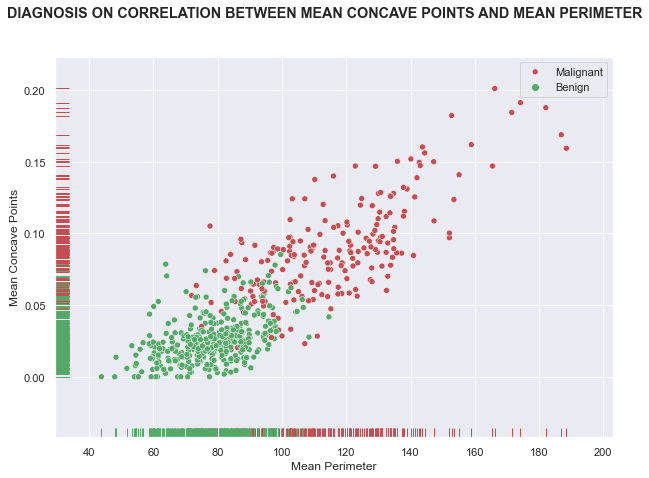

In [353]:
fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle('DIAGNOSIS ON CORRELATION BETWEEN MEAN CONCAVE POINTS AND MEAN PERIMETER', fontweight='bold')

colors = {0: "g", 1: "r"}
sns.set(style='darkgrid')
sns.scatterplot(data = mean_df, x = 'perimeter_mean', y = 'concave points_mean', hue = 'diagnosis', palette=colors)
sns.rugplot(data = mean_df, x = 'perimeter_mean', y = 'concave points_mean', hue = 'diagnosis', palette=colors)
plt.legend(['Malignant','Benign'])
ax.set_ylabel('Mean Concave Points')
ax.set_xlabel('Mean Perimeter')
plt.show()

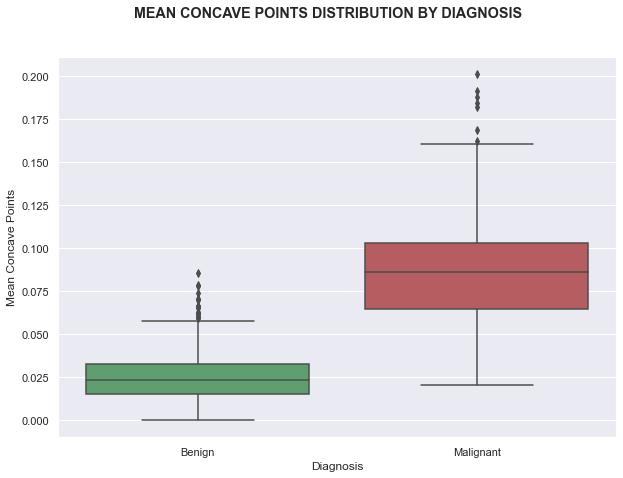

In [351]:
fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle('MEAN CONCAVE POINTS DISTRIBUTION BY DIAGNOSIS', fontweight='bold')

colors = {0: "g", 1: "r"}
sns.set(style='darkgrid')
sns.boxplot(data=mean_df, x='diagnosis', y='concave points_mean', palette=colors)
ax.set_xticklabels(['Benign','Malignant'])
ax.set_ylabel('Mean Concave Points')
ax.set_xlabel('Diagnosis')

plt.show()

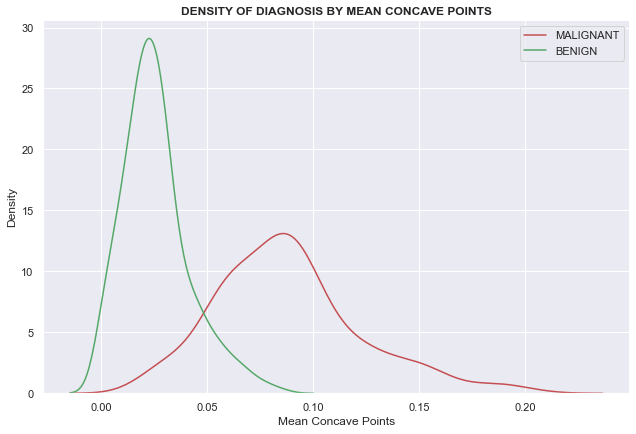

In [355]:
colors = {0: "g", 1: "r"}
sns.set(style='darkgrid')
sns.displot(data = mean_df, x = 'concave points_mean', hue = 'diagnosis', kind = 'kde', \
    common_norm = False, palette=colors, legend=False, height=6, aspect=1.5)
plt.title('DENSITY OF DIAGNOSIS BY MEAN CONCAVE POINTS', fontweight='bold')
plt.legend(['MALIGNANT', 'BENIGN'])
plt.xlabel('Mean Concave Points')

plt.show()